To get all the data from all surverys covering 5c7.269 using vizier

In [2]:
from astroquery.vizier import Vizier
# Vizier.ROW_LIMIT = -1
import pandas as pd
import numpy as np
# pd.set_option('display.max_rows', None)
import astropy.units as u
from astroquery.simbad import Simbad
from astropy.visualization import astropy_mpl_style
from astropy.coordinates import Angle
import matplotlib.pyplot as plt

In [ ]:
df = pd.DataFrame(columns=['ID','description'])

In [ ]:
result = Vizier.query_object("NVSS J082838+252827")
for table in result:
    item = table.meta
    # print(item)
    df = df.append(item, ignore_index=True)

print(df)

In [ ]:
df['name']

Query using coordinate instaed of Object?

In [ ]:
data_5C7 = Simbad.query_object("5C7.269")

In [ ]:
# query surrounding 420 arcsec from the coordinate of 5C7.269
surrounding_5C7 = Simbad.query_region("5C7.269", radius=420 * u.arcsec)

print(surrounding_5C7)

In [ ]:
# plot the surrounding 5C7.269
plt.style.use(astropy_mpl_style)
c = SkyCoord(ra=surrounding_5C7['RA'], dec=surrounding_5C7['DEC'], unit=(u.hourangle, u.deg))
plt.scatter(c.ra.deg, c.dec.deg)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('Sources surrounding 5C7.269 (420arcsec) from Database')
# set plot to have same x and y scale
plt.gca().set_aspect('equal', adjustable='box')
# plt.show()

coor_5C7 = SkyCoord(ra=data_5C7['RA'], dec=data_5C7['DEC'], unit=(u.hourangle, u.deg))
plt.scatter(coor_5C7.ra.deg, coor_5C7.dec.deg, label='catalogue')
radius = Angle(420, u.arcsec).deg
# plot a circle with radius 420 arcsec
circle = plt.Circle((coor_5C7.ra.deg, coor_5C7.dec.deg), radius, color='r', fill=False)
plt.gca().add_patch(circle)

detection = pd.read_table('5C7.269_sources.dat',sep='\s+',index_col='obj_id')
coor_detection = SkyCoord(ra=detection['ra'], dec=detection['dec'], unit=(u.hourangle, u.deg))
plt.scatter(coor_detection.ra.deg, coor_detection.dec.deg, label='detection')
plt.legend()

In [ ]:
bibcode = surrounding_5C7.to_pandas()['COO_BIBCODE'].value_counts()
catalog_source = pd.DataFrame(columns=['ID','description','N_galaxy'])
for bcode,occ in bibcode.items():
    print(bcode, occ)
    survey = Vizier.get_catalogs(bcode)
    description = survey[0].meta['description']
    row = {'ID':bcode, 'description':description, 'N_galaxy':occ}
    catalog_source = catalog_source.append(row, ignore_index=True)
    print(description)
catalog_source

In [3]:
# query with nasa ned

from astroquery.ipac.ned import Ned

ned_result = Ned.query_region("5C7.269", radius=420 * u.arcsec)
ned_result

No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
,,degrees,degrees,,km / s,,,,arcmin,,,,,,,
int32,str30,float64,float64,object,float64,float64,object,object,float64,int32,int32,int32,int32,int32,int32,int32
1,WISEA J082808.01+252750.6,127.03342,25.464,*,--,--,,22.1g,6.969,0,0,17,2,0,4,0
2,WISEA J082808.49+252816.6,127.03539,25.47128,IrS,--,--,,,6.838,0,0,12,1,0,0,0
3,SDSS J082808.53+252712.3,127.03557,25.45344,G,--,--,,23.1g,6.939,0,0,15,1,0,4,0
4,WISEA J082808.63+252846.7,127.03591,25.47962,G,--,--,,23.3g,6.815,0,0,27,2,0,4,0
5,SDSS J082808.74+252815.1,127.03644,25.47087,G,--,--,,22.3g,6.782,0,0,15,1,0,3,0
6,NVSS J082808+252954,127.03675,25.4985,RadioS,--,--,,0.93,6.917,0,0,1,1,0,0,3
7,SDSS J082808.82+252940.7,127.03679,25.49464,*,--,--,,21.4g,6.87,0,0,9,2,0,4,1
8,WISEA J082808.87+252952.8,127.03698,25.49801,G,--,--,,21.8g,6.898,2,0,27,2,0,4,1


In [5]:
ned_result = ned_result.to_pandas()

In [21]:
ned_result

,No.,Object Name,RA,DEC,Type,Velocity,Redshift,Redshift Flag,Magnitude and Filter,Separation,References,Notes,Photometry Points,Positions,Redshift Points,Diameter Points,Associations
0,1,WISEA J082808.01+252750.6,127.03342,25.46400,*,NaN,NaN,,22.1g,6.969,0,0,17,2,0,4,0
1,2,WISEA J082808.49+252816.6,127.03539,25.47128,IrS,NaN,NaN,,,6.838,0,0,12,1,0,0,0
2,3,SDSS J082808.53+252712.3,127.03557,25.45344,G,NaN,NaN,,23.1g,6.939,0,0,15,1,0,4,0
3,4,WISEA J082808.63+252846.7,127.03591,25.47962,G,NaN,NaN,,23.3g,6.815,0,0,27,2,0,4,0
4,5,SDSS J082808.74+252815.1,127.03644,25.47087,G,NaN,NaN,,22.3g,6.782,0,0,15,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216,1217,WISEA J082908.53+252854.4,127.28555,25.48178,IrS,NaN,NaN,,,6.730,0,0,12,1,0,0,0
1217,1218,WISEA J082908.57+252744.4,127.28569,25.46239,G,NaN,NaN,,21.5g,6.760,0,0,27,2,0,4,0
1218,1219,SDSS J082908.63+252722.8,127.28597,25.45635,*,NaN,NaN,,23.8g,6.823,0,0,5,1,0,4,0
1219,1220,WISEA J082909.16+252821.2,127.28813,25.47239,G,NaN,NaN,,22.3g,6.856,0,0,27,2,0,4,0


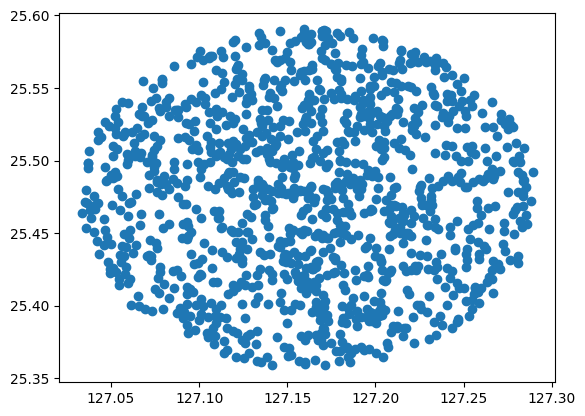

In [9]:
plt.scatter(ned_result['RA'], ned_result['DEC'])

In [ ]:
# exploring SDSS data
from astroquery.sdss import SDSS
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)

# query SDSS data
data = SDSS.query_region("5C7.269", radius=420 * u.arcsec)
data = data.to_pandas()
plt.scatter(data['ra'], data['dec'], label='SDSS')
data